**Задание 3.7**<br>
Вы тестируете форму ввода личных данных клиента. В исходной версии клиент должен обязательно указать номер телефона, имя и адрес, а в новой версии обязательным для заполнения является только поле с номером телефона (имя и адрес можно не оставлять).

Вам необходимо рассчитать размер выборки для A/B-теста сценария оформления заказа на сайте.

У вас есть данные за год (365 дней). Вы знаете, что из 2 000 000 пользователей, которые открыли эту форму за год, 600 000 пользователей заполняли её.

Вы ожидаете, что новая форма покажет минимальное увеличение конверсии относительно базовой в 5 % (опция Relative). Рассчитайте необходимый размер выборки при мощности теста в 80 % и уровне значимости в 5 %.

С помощью [калькулятора Эвана Миллера](https://www.evanmiller.org/ab-testing/sample-size.html) вычислите необходимый размер выборки посетителей страницы.

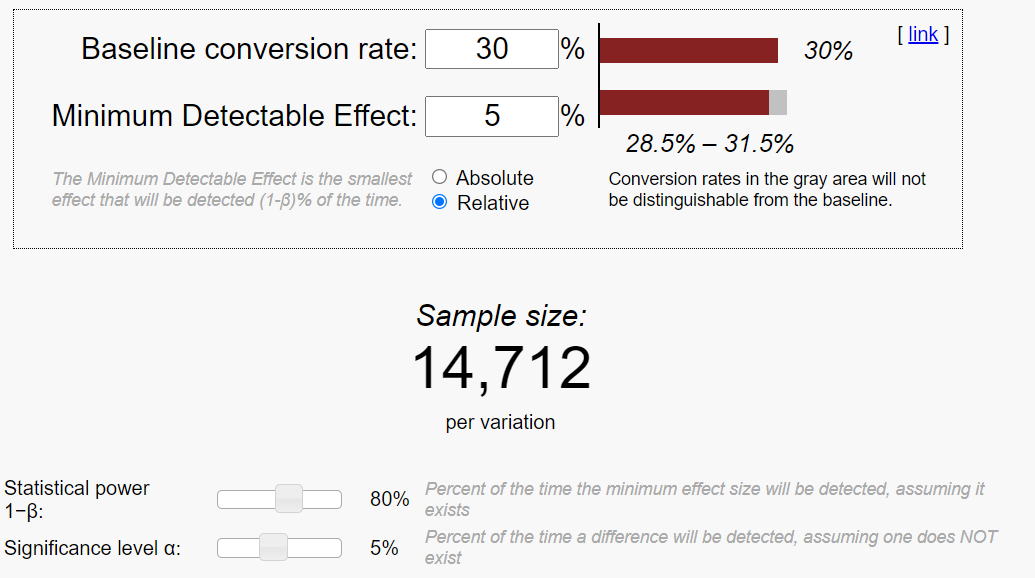

**Задание 3.8**<br>
[Калькулятор VWO](https://vwo.com/tools/ab-test-duration-calculator/)
Вы тестируете новую версию системы рекомендаций товаров. Версии сравниваются по конверсии действия «добавить товар в корзину».

Вы знаете, что в среднем на сайт интернет-магазина ежедневно заходит 6 000 пользователей. Из них в среднем 720 пользователей добавляют товар из рекомендуемых в корзину.

Вы ожидаете, что новая рекомендательная система покажет минимальное увеличение конверсии относительно базовой в 5 %. В тестирование вовлечены все пользователи.

Рассчитайте необходимую длительность A/B-теста и запишите количество дней.

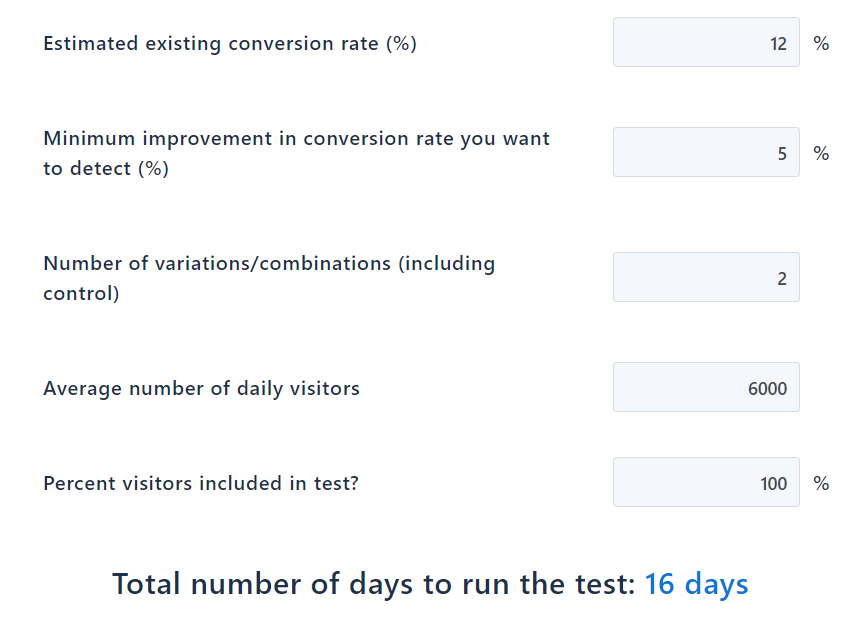

**Задание 4.1**<br>
Рассчитайте конверсию на каждый день по приведённой формуле. Результат занесите в столбец conversion. Чему была равна конверсия (в процентах) в группе А 5 января 2017 года? Ответ округлите до второго знака после запятой.

In [ ]:
daily_data['conversion'] = (daily_data['converted']/daily_data['users_count'])*100

**Задание 4.6**<br>
Постройте таблицу со следующими ежедневными показателями:

- количество посетителей сайта;
- суммарное число транзакций;
- общая сумма покупок (выручка).
Для этого сгруппируйте данные по признаку date, предварительно преобразовав его к типу datetime.

Чему равны значения ежедневных показателей в группе А на 8 ноября 2020 года?

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sample_a = pd.read_csv('data/ab_test-redesign_sample_a.csv')
sample_b = pd.read_csv('data/ab_test-redesign_sample_b.csv')

In [9]:
sample_a['date'] = pd.to_datetime(sample_a['date'], format='%Y-%m-%d')
sample_b['date'] = pd.to_datetime(sample_b['date'], format='%Y-%m-%d')

In [10]:
daily_data_sample_a = sample_a.groupby(['date', 'group']).agg({
    'cid':'count',
    'transactions':'sum',
    'revenue':'sum'
}).reset_index().rename(columns={'cid': 'cid_count', 'transactions': 'transactions_sum', 'revenue': 'revenue_sum'})
daily_data_sample_b = sample_b.groupby(['date', 'group']).agg({
    'cid':'count',
    'transactions':'sum',
    'revenue':'sum'
}).reset_index().rename(columns={'cid': 'cid_count', 'transactions': 'transactions_sum', 'revenue': 'revenue_sum'})

In [76]:
daily_data_sample_a.head()

,date,group,cid_count,transactions_sum,revenue_sum
0,2020-11-06,A,2576,16,1577279
1,2020-11-07,A,2704,23,1721886
2,2020-11-08,A,3354,25,846051
3,2020-11-09,A,3234,18,708830
4,2020-11-10,A,3022,29,826984


**Задание 4.7**<br>
Добавьте в каждую из таблиц кумулятивные метрики:

- кумулятивное количество посетителей сайта;
- кумулятивное суммарное число транзакций;
- кумулятивная общая сумма покупок (кумулятивная выручка).

Рассчитайте кумулятивную конверсию действия покупки (в процентах) и кумулятивный средний чек (кумулятивная выручка/кумулятивное суммарное число транзакций).

Чему равна средняя кумулятивная конверсия в группах за весь период проведения A/B-теста? Ответ округлите до сотых, знаки процентов не вводите.

In [11]:
# вычисляем кумулятивную сумму количества посетителей
daily_data_sample_a['cum_cid_count'] = daily_data_sample_a['cid_count'].cumsum()
daily_data_sample_b['cum_cid_count'] = daily_data_sample_b['cid_count'].cumsum()
# вычисляем кумулятивное суммарное число транзакций
daily_data_sample_a['cum_transactions_sum'] = daily_data_sample_a['transactions_sum'].cumsum()
daily_data_sample_b['cum_transactions_sum'] = daily_data_sample_b['transactions_sum'].cumsum()
# кумулятивная общая сумма покупок (кумулятивная выручка).
daily_data_sample_a['cum_revenue_sum'] = daily_data_sample_a['revenue_sum'].cumsum()
daily_data_sample_b['cum_revenue_sum'] = daily_data_sample_b['revenue_sum'].cumsum()
# вычисляем кумулятивную конверсию действия покупки (в процентах)
daily_data_sample_a['cum_conversion'] = daily_data_sample_a['cum_transactions_sum']/daily_data_sample_a['cum_cid_count'] * 100
daily_data_sample_b['cum_conversion'] = daily_data_sample_b['cum_transactions_sum']/daily_data_sample_b['cum_cid_count'] * 100
# вычисляем кумулятивный средний чек (кумулятивная выручка/кумулятивное суммарное число транзакций)
daily_data_sample_a['cum_revenue_mean'] = daily_data_sample_a['cum_revenue_sum']/daily_data_sample_a['cum_transactions_sum']
daily_data_sample_b['cum_revenue_mean'] = daily_data_sample_b['cum_revenue_sum']/daily_data_sample_b['cum_transactions_sum']

In [78]:
display(round(daily_data_sample_a['cum_conversion'].mean(), 2))
display(round(daily_data_sample_b['cum_conversion'].mean(), 2))

0.71

0.76

**Задание 4.8**<br>
Постройте графики кумулятивной конверсии в каждой группе. Какие выводы по ним вы можете сделать?

In [79]:
daily_data_marged = pd.concat(
    [daily_data_sample_a, daily_data_sample_b],
    ignore_index=True,
    axis=0

)
daily_data_marged

,date,group,cid_count,transactions_sum,revenue_sum,cum_cid_count,cum_transactions_sum,cum_revenue_sum,cum_conversion,cum_revenue_mean
0,2020-11-06,A,2576,16,1577279,2576,16,1577279,0.621118,98579.937500
1,2020-11-07,A,2704,23,1721886,5280,39,3299165,0.738636,84593.974359
2,2020-11-08,A,3354,25,846051,8634,64,4145216,0.741256,64769.000000
3,2020-11-09,A,3234,18,708830,11868,82,4854046,0.690934,59195.682927
4,2020-11-10,A,3022,29,826984,14890,111,5681030,0.745467,51180.450450
5,2020-11-11,A,3218,19,1209656,18108,130,6890686,0.717915,53005.276923
6,2020-11-12,A,3467,19,607839,21575,149,7498525,0.690614,50325.671141
7,2020-11-13,A,3676,36,1338816,25251,185,8837341,0.732644,47769.410811
8,2020-11-14,A,3372,30,2659277,28623,215,11496618,0.751144,53472.641860
9,2020-11-15,A,3881,27,1189970,32504,242,12686588,0.744524,52423.917355


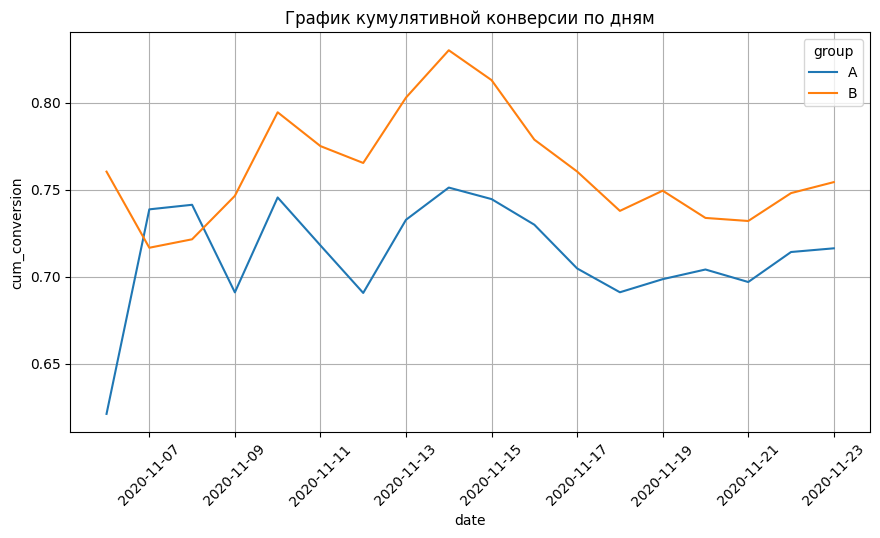

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

# создаём фигуру размером 8x4
fig = plt.figure(figsize=(8, 4))
# добавляем систему координат
ax = fig.add_axes([1, 1, 1, 1])
# строим lineplot для кумулятивной конверсии во времени в каждой группе
sns.lineplot(x='date', y='cum_conversion', data=daily_data_marged, hue='group', ax=ax)
# задаём подпись к графику
ax.set_title('График кумулятивной конверсии по дням')
# задаём поворот меток на оси абсцисс
ax.xaxis.set_tick_params(rotation = 45)
# задаём отображение сетки
ax.grid(True);

**Задание 4.9**<br>
Постройте графики кумулятивного среднего чека в каждой группе. Какие выводы по ним вы можете сделать?

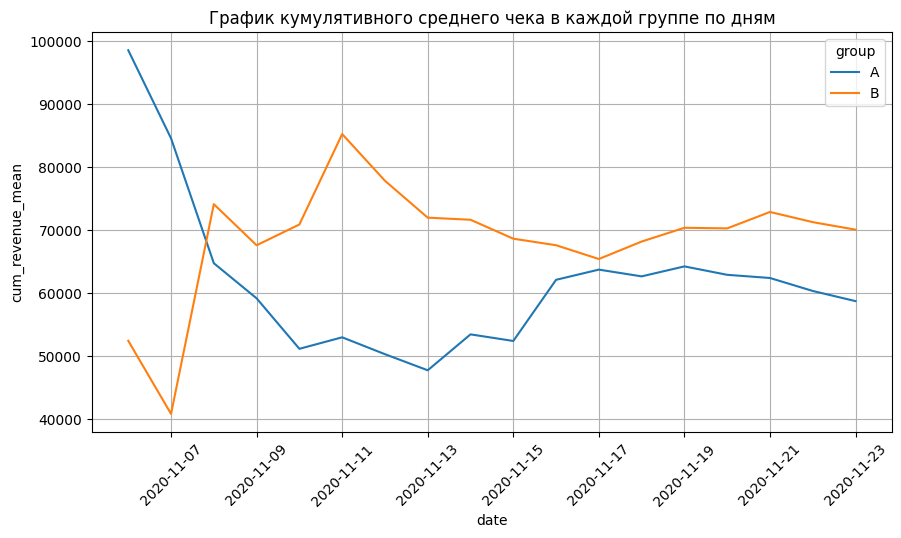

In [80]:
# создаём фигуру размером 8x4
fig = plt.figure(figsize=(8, 4))
# добавляем систему координат
ax = fig.add_axes([1, 1, 1, 1])
# строим lineplot для кумулятивной конверсии во времени в каждой группе
sns.lineplot(x='date', y='cum_revenue_mean', data=daily_data_marged, hue='group', ax=ax)
# задаём подпись к графику
ax.set_title('График кумулятивного среднего чека в каждой группе по дням')
# задаём поворот меток на оси абсцисс
ax.xaxis.set_tick_params(rotation = 45)
# задаём отображение сетки
ax.grid(True);

**Задание 5.2**<br>
Проверьте гипотезу о равенстве конверсий в группах А и B при альтернативной гипотезе: Конверсия в группе А меньше, чем конверсия в группе B. Используйте функцию proportions_ztest() из модуля statsmodels.stats.proportion. В качестве уровня значимости возьмите Альфа=0.1

In [5]:
ab_data = pd.read_csv('data/ab_data.csv')
converted_piv= ab_data.groupby('group')['converted'].agg(
    ['sum', 'count']
)

from statsmodels.stats.proportion import proportions_ztest

# нулевая и альтернативная гипотезы
H0 = 'Конверсии в группах А и B равны'
H1 = 'Конверсия в группе А выше, чем конверсия в группе B'
alpha = 0.1 # уровень значимости
# вычисляем значение p-value для z-теста для пропорций
_, p_value = proportions_ztest(
    count=converted_piv['sum'], #число "успехов"
    nobs=converted_piv['count'], #общее число наблюдений
    alternative='smaller',
)
# выводим результат на экран
print('p-value: ', round(p_value, 2))
# сравниваем полученное p-value с уровнем значимости
if (p_value < alpha): 
    print("Отвергаем нулевую гипотезу. {}".format(H0))
    print("Альтернативная гипотеза. H1: {}".format(H1))
else:
    print("Принимаем нулевую гипотезу. {}".format(H0))
 
# p-value:  0.1
# Принимаем нулевую гипотезу. Конверсии в группах А и B равны

p-value:  0.9
Принимаем нулевую гипотезу. Конверсии в группах А и B равны


**Задание 5.3**<br>
Проверьте гипотезу о нормальности распределений ежедневного среднего чека с помощью критерия Шапиро-Уилка. В качестве уровня значимости возьмите Альфа=0.1.

In [12]:
from scipy.stats import shapiro
# нулевая и альтернативная гипотезы
H0 = 'Распределения в обеих группах нормальные'
H1 = 'Распределение в одной или обеих группах отлично от нормального'
alpha = 0.1 # уровень значимости
# вычисляем результат теста Шапиро-Уилка для выборок
shapiro_result_a = shapiro(daily_data_sample_a['cum_revenue_mean'])
shapiro_result_b = shapiro(daily_data_sample_b['cum_revenue_mean'])
print('p-value группы А', round(shapiro_result_a.pvalue, 2))
print('p-value группы B', round(shapiro_result_b.pvalue, 2))
# сравниваем полученное p-value с уровнем значимости
if shapiro_result_a.pvalue < alpha or shapiro_result_b.pvalue < alpha:
    print("Отвергаем нулевую гипотезу. {}".format(H0))
    print("Альтернативная гипотеза. H1: {}".format(H1))
else:
    print("Принимаем нулевую гипотезу. {}".format(H0))

p-value группы А 0.0
p-value группы B 0.0
Отвергаем нулевую гипотезу. Распределения в обеих группах нормальные
Альтернативная гипотеза. H1: Распределение в одной или обеих группах отлично от нормального


**Задание 5.4**<br>
Проверьте гипотезу о равенстве ежедневных средних чеков с помощью критерия Манна-Уитни при альтернативной гипотезе: Ежедневный средний чек в группе А меньше, чем в группе B. Используйте функцию mannwhitneyu() из модуля scipy.stats. В качестве уровня значимости возьмите .

In [13]:
from scipy.stats import mannwhitneyu

In [14]:
mannwhitneyu(daily_data_sample_a['cum_revenue_mean'], daily_data_sample_b['cum_revenue_mean'], alternative='less', axis=0, method='auto')

MannwhitneyuResult(statistic=63.0, pvalue=0.0009153623248471154)

In [16]:
# нулевая и альтернативная гипотезы
H0 = 'Конверсии в группах А и B равны'
H1 = 'Ежедневный средний чек в группе А меньше, чем в группе B'
alpha = 0.1 # уровень значимости
# вычисляем значение p-value для критерия Манна-Уитни
_, p_value = mannwhitneyu(daily_data_sample_a['cum_revenue_mean'], 
                          daily_data_sample_b['cum_revenue_mean'], 
                          alternative='less', 
                          axis=0, 
                          method='auto'
)
# выводим результат на экран
print('p-value: ', round(p_value, 2))
# сравниваем полученное p-value с уровнем значимости
if (p_value < alpha): 
    print("Отвергаем нулевую гипотезу. {}".format(H0))
    print("Альтернативная гипотеза. H1: {}".format(H1))
else:
    print("Принимаем нулевую гипотезу. {}".format(H0))

p-value:  0.0
Отвергаем нулевую гипотезу. Конверсии в группах А и B равны
Альтернативная гипотеза. H1: Ежедневный средний чек в группе А меньше, чем в группе B


**Задание 6.5**<br>
Аккумуляторный завод производит батарейки, срок службы которых имеет истинное стандартное отклонение в 2.4 месяца. Средний срок службы батареек в случайной выборке из 64 штук составил 12.35 месяца. Необходимо построить 90 %-ный доверительный интервал для истинного среднего срока службы производимой батарейки и ответить на вопросы заданий ниже.

In [20]:
n = 64 # размер выборки 
x_mean = 12.35 # выборочное среднее 
sigma = 2.4 # истинное стандартное отклонение 
gamma = 0.90 # уровень надёжности 
alpha = 1 - gamma # уровень значимости

In [21]:
from scipy.stats import norm
z_crit = -norm.ppf(alpha/2) # z критическое
round(z_crit, 2)

1.64

In [22]:
eps = z_crit * sigma/(n ** 0.5) #погрешность
lower_bound = x_mean - eps # левая (нижняя) граница
upper_bound = x_mean + eps # правая (верхняя) граница
confidence_interval = (round(lower_bound, 2), round(upper_bound, 2)) # создаём кортеж из округлённых границ интервала
print('Доверительный интервал: {}'.format(confidence_interval)) # выводим результат

Доверительный интервал: (11.86, 12.84)


**Задание 6.6**<br>
Чиновника интересует сумма подоходного налога, выплачиваемого домохозяйствами за год. На случайной выборке из 25 домохозяйств был посчитан средний размер выплаченного налога, и он составил $ 3 540. 

Также известно выборочное отклонение величины подоходного налога, равное $ 1 150.

Необходимо найти 90 %-ый доверительный интервал для истинного среднего значения налоговых выплат за год. Используйте формулу с t-критическим.

Укажите границы построенного доверительного интервала для истинного среднего. Ответ округлите до целого.

In [6]:
n = 25 # размер выборки
k = n - 1 # число степеней свободы
x_mean = 3540 # выборочное среднее
x_std = 1150 # выборочное стандартное отклонение
gamma = 0.9 # уровень надёжности
alpha = 1 - gamma # уровень значимости

In [7]:
from scipy.stats import t
t_crit = -t.ppf(alpha/2, k) # t-критическое

In [1]:
n = 64 # размер выборки 
x_mean = 12.35 # выборочное среднее 
sigma = 2.4 # истинное стандартное отклонение 
gamma = 0.9 # уровень надёжности 
alpha = 1 - gamma # уровень значимости

In [8]:
eps = t_crit * x_std/(n ** 0.5) # погрешность
lower_bound = x_mean - eps # левая (нижняя) граница
upper_bound = x_mean + eps # правая (верхняя) граница
confidence_interval = (round(lower_bound), round(upper_bound)) # создаём кортеж из округлённых границ интервала
print('Доверительный интервал: {}'.format(confidence_interval)) # выводим результат

Доверительный интервал: (3146, 3934)


**Задание 6.9**<br>
Чтобы оценить удовлетворённость клиентов сети отелей, менеджер взял случайную выборку из 189 комментариев, оставленных посетителями на онлайн-платформе по бронированию, и провёл анализ их содержания. Выяснилось, что 132 комментария были положительными, остальные — негативными.

In [23]:
n = 189 # размер выборки, 
x_p = 132/ 189 #выборочная пропорция

In [27]:
def proportions_conf_interval(n, x_p, gamma=0.9):   
    alpha = 1 - gamma # уровень значимости
    z_crit = -norm.ppf(alpha/2) # z критическое
    eps = z_crit * (x_p * (1 - x_p) / n) ** 0.5 #погрешность
    lower_bound = x_p - eps # левая (нижняя) граница
    upper_bound = x_p + eps # правая (верхняя) граница
    # возвращаем кортеж из округлённых границ интервала
    return round(lower_bound * 100, 2), round(upper_bound * 100, 2)

In [28]:
conf_interval_a = proportions_conf_interval(
n, # размер выборки
x_p # выборочная пропорция
)
print(round(x_p, 3), conf_interval_a)

0.698 (64.35, 75.33)


**Задание 6.10**<br>
Проводится A/B-тестирование вариантов отображения страницы корзины на сайте интернет-магазина. Есть два варианта отображения страницы: с товарными рекомендациями «Хиты продаж» и персональными, подобранными под интерес конкретно этого пользователя. Метрикой является конверсия действия «добавить в корзину товар из рекомендаций». Были собраны следующие данные:

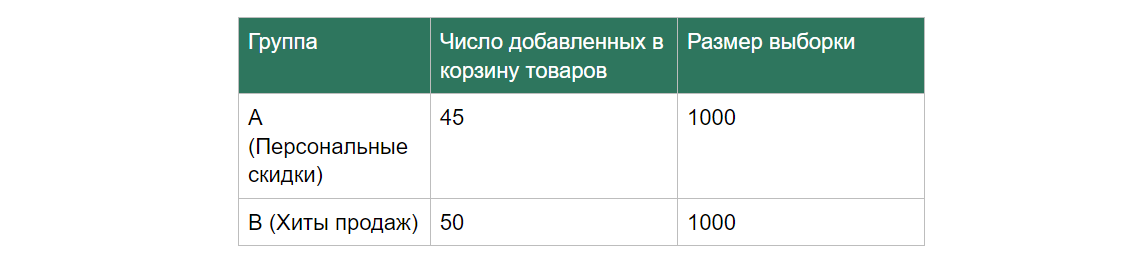

Постройте 95 %-ый доверительный интервал разности полученных конверсий. Ответ приведите в процентах и округлите границы интервала до второго знака после запятой. При расчёте используйте z-критическое.

In [31]:
def diff_proportions_conf_interval(n, xp, gamma=0.95):
    alpha = 1 - gamma # уровень значимости
    diff = xp[1] - xp[0] # выборочная разница конверсий групп B и A
    z_crit = -norm.ppf(alpha/2) # z критическое
    eps = z_crit * (xp[0] * (1 - xp[0])/n[0] + xp[1] * (1 - xp[1])/n[1]) ** 0.5 # погрешность
    lower_bound = diff - eps # левая (нижняя) граница
    upper_bound = diff + eps # правая (верхняя) граница
    # возвращаем кортеж из округлённых границ интервала
    return round(lower_bound *100, 2), round(upper_bound * 100, 2)

In [32]:
# размеры выборок групп А и B
n = [1000, 1000]
# выборочная пропорция групп A и B
xp = [45/1000, 50/1000]
# строим доверительный интервал для разности конверсий
diff_inverval = diff_proportions_conf_interval(n, xp)
print('Доверительный интервал для разности конверсий: {}'.format(diff_inverval))

Доверительный интервал для разности конверсий: (-1.36, 2.36)
